In [68]:
import numpy as np
import matplotlib.pyplot as plt

Aufgabe 3a)

In [69]:
def cubic_spline(x,y,xx):
    if x.size < 2:
        return 0
    a = y[:-1]
    h = x[1:] - x[:-1]
    c = np.zeros(x.size)

    if x.size > 2:
        A = np.diag(2*(h[:-1] + h[1:])) + np.diag(h[1:-1], -1) + np.diag(h[1:-1], 1)
        z = 3 * (y[2:] - y[1:-1]) / h[1:] - 3 * (y[1:-1] - y[:-2]) / h[:-1]
        print(z)
        c[1:-1] = np.linalg.solve(A, z)
        print(c)

    b = (y[1:] - y[:-1]) / h[:] - (c[1:] + 2*c[:-1]) * h[:] / 3
    print(b)
    d = (c[1:] - c[:-1]) / (3 * h[:])
    print(d)

    yy = np.zeros(xx.size)
    for k in range(x.size - 1):
        idx = (xx >= x[k]) & (xx <= x[k+1])
        dx = xx[idx] - x[k]
        yy[idx] = a[k] + b[k] * dx + c[k] * dx**2 + d[k] * dx**3

    return yy

In [70]:
x = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
y = np.array([75.995, 91.972, 105.711, 123.203, 131.669, 150.697, 179.323, 203.212, 226.505, 249.633, 281.422, 308.745])
xx = np.arange(1900, 2010, 0.1)

In [71]:
yy = cubic_spline(x, y, xx)

[-0.6714  1.1259 -2.7078  3.1686  2.8794 -1.4211 -0.1788 -0.0495  2.5983
 -1.3398]
[ 0.         -0.03246555  0.06272218 -0.10583319  0.08983058  0.06337087
 -0.05537407  0.0160154  -0.02656752  0.08530467 -0.05482117  0.        ]
[1.70591849 1.38126303 1.68382941 1.25271934 1.09269323 2.62470774
 2.70467579 2.31108908 2.20556787 2.79293942 3.09777445]
[-0.00108218  0.00317292 -0.00561851  0.00652213 -0.00088199 -0.00395816
  0.00237965 -0.00141943  0.00372907 -0.00467086  0.00182737]


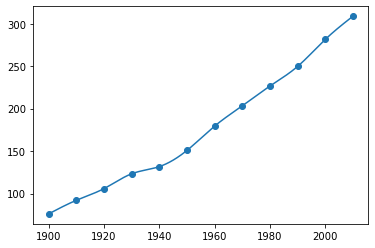

In [72]:
plt.plot(xx, yy)
plt.scatter(x, y)

Aufgabe 3b)

In [73]:
from scipy import interpolate

In [74]:
cs = interpolate.CubicSpline(x, y)
yy_cubic_spline = cs(xx)

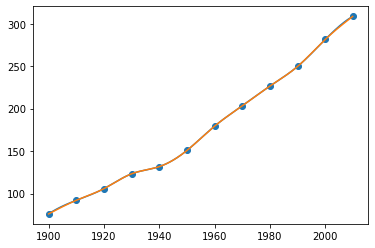

In [80]:
plt.plot(xx, yy_cubic_spline)
plt.plot(xx, yy)
plt.scatter(x, y)

Aufgabe 3c)

In [76]:
degree = x.size - 1
coefficients = np.polyfit(x - 1900, y, degree)

In [77]:
yy_polyfit = np.polyval(coefficients, xx - 1900)

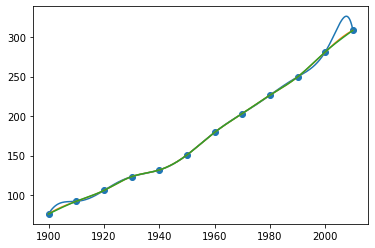

In [79]:
plt.plot(xx, yy_polyfit)
plt.plot(xx, yy_cubic_spline)
plt.plot(xx, yy)
plt.scatter(x, y)